In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [2]:
census_data=pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
census_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
census_data[census_data=='?']=np.nan

In [4]:
census_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
census_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
null_columns =['workclass','occupation','native.country']
for i in null_columns:
    census_data.fillna(census_data[i].mode()[0], inplace=True)

In [7]:
census_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0            Private  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2            Private      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

<AxesSubplot:xlabel='count', ylabel='workclass'>

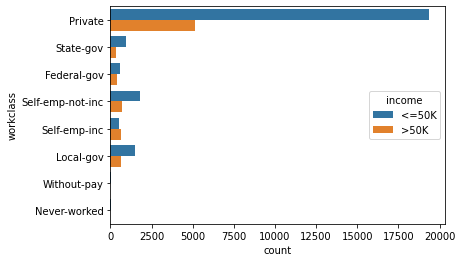

In [8]:
sns.countplot(y=census_data['workclass'], hue=census_data['income'])

<AxesSubplot:xlabel='sex', ylabel='count'>

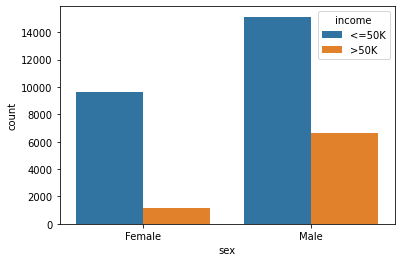

In [9]:
sns.countplot(census_data['sex'], hue=census_data['income'])

<AxesSubplot:xlabel='race', ylabel='count'>

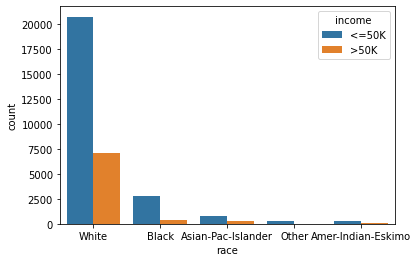

In [10]:
sns.countplot(x=census_data['race'], hue=census_data['income'])

<AxesSubplot:xlabel='count', ylabel='education'>

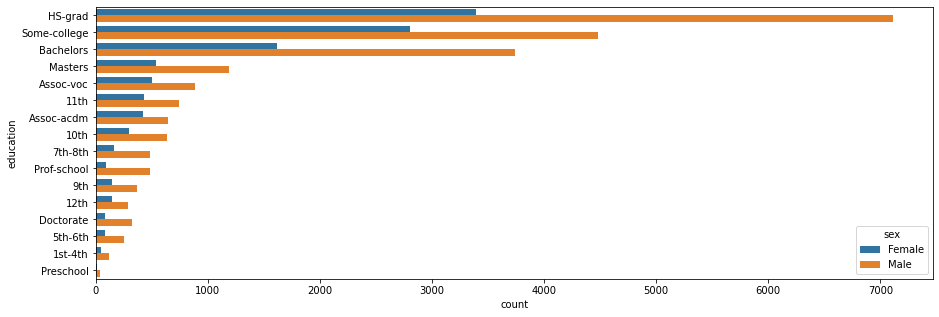

In [11]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=census_data['education'], hue=census_data['sex'], order = census_data['education'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='relationship'>

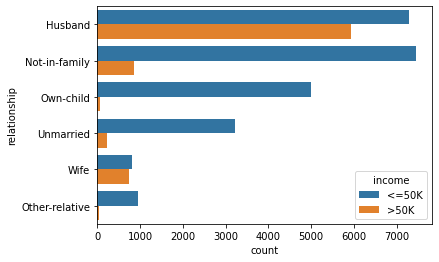

In [12]:
sns.countplot(y=census_data['relationship'], hue=census_data['income'], order = census_data['relationship'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='marital.status'>

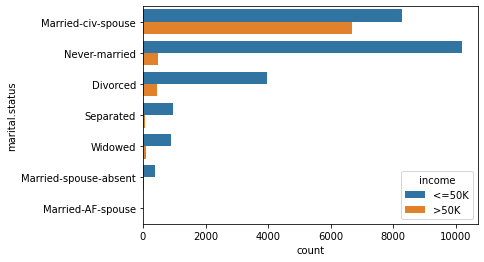

In [13]:
sns.countplot(y=census_data['marital.status'], hue=census_data['income'], order = census_data['marital.status'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='education'>

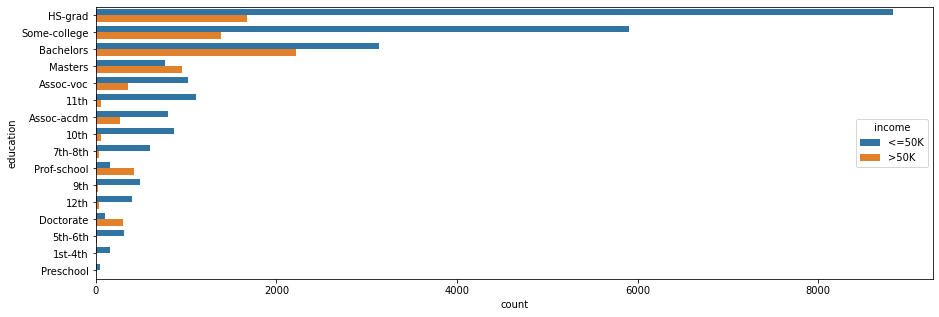

In [14]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=census_data['education'], hue=census_data['income'], order = census_data['education'].value_counts().index)

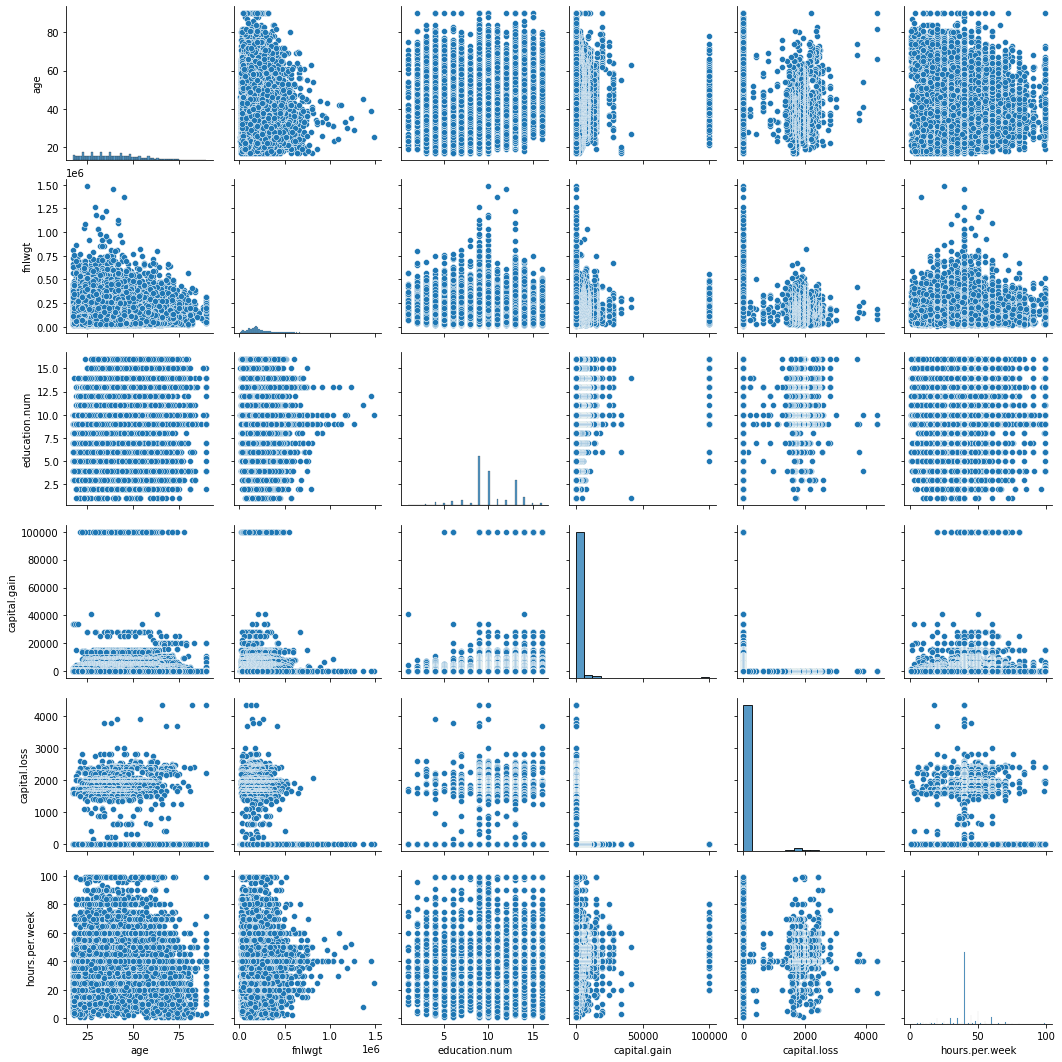

In [15]:
sns.pairplot(census_data)

<AxesSubplot:>

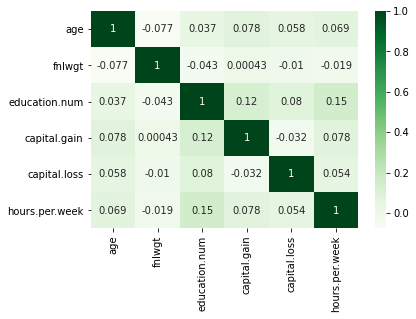

In [16]:
sns.heatmap(census_data.corr(), annot=True, cmap="Greens")

In [17]:
census_data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0            Private  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2            Private      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [18]:
census_data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [19]:
census_data['income'] = census_data['income'].replace({'<=50K':0, '>50K':1})
census_data['sex'] = census_data['sex'].replace({'Female':0, 'Male':1})
census_data['race'] = census_data['race'].replace({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Other':3,'Amer-Indian-Eskimo':4})
census_data['workclass'] = census_data['workclass'].replace({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3,
       'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6, 'Never-worked':7})
census_data['native.country'] = census_data['native.country'].replace({'United-States':0, 'Private':1, 'Mexico':2, 'Greece':3, 'Vietnam':4, 'China':5,
       'Taiwan':6, 'India':7, 'Philippines':8, 'Trinadad&Tobago':9, 'Canada':10,
       'South':11, 'Holand-Netherlands':12, 'Puerto-Rico':13, 'Poland':14, 'Iran':15,
       'England':16, 'Germany':17, 'Italy':18, 'Japan':19, 'Hong':20, 'Honduras':21, 'Cuba':22,
       'Ireland':23, 'Cambodia':24, 'Peru':25, 'Nicaragua':26, 'Dominican-Republic':27,
       'Haiti':28, 'El-Salvador':29, 'Hungary':30, 'Columbia':31, 'Guatemala':32,
       'Jamaica':33, 'Ecuador':34, 'France':35, 'Yugoslavia':36, 'Scotland':37,
       'Portugal':38, 'Laos':39, 'Thailand':40, 'Outlying-US(Guam-USVI-etc)':41})
census_data['occupation'] = census_data['occupation'].replace({'Private':0, 'Exec-managerial':1, 'Machine-op-inspct':2,
       'Prof-specialty':3, 'Other-service':4, 'Adm-clerical':5, 'Craft-repair':6,
       'Transport-moving':7, 'Handlers-cleaners':8, 'Sales':9,
       'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12,
       'Armed-Forces':13, 'Priv-house-serv':14})
census_data['relationship'] = census_data['relationship'].replace({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,
       'Husband':4, 'Wife':5})
census_data['education'] = census_data['education'].replace({'HS-grad':0, 'Some-college':1, '7th-8th':2, '10th':3, 'Doctorate':4,
       'Prof-school':5, 'Bachelors':6, 'Masters':7, '11th':8, 'Assoc-acdm':9,
       'Assoc-voc':10, '1st-4th':11, '5th-6th':12, '12th':13, '9th':14, 'Preschool':15})
census_data['marital.status'] = census_data['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
census_data['marital.status'] = census_data['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
census_data['marital.status'] = census_data['marital.status'].map({'Married':1, 'Single':0})

In [20]:
census_data.head()

age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          0   77053          0              9               0   
1   82          0  132870          0              9               0   
2   66          0  186061          1             10               0   
3   54          0  140359          2              4               0   
4   41          0  264663          1             10               0   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           0             0     0    0             0          4356   
1           1             0     0    0             0          4356   
2           0             1     1    0             0          4356   
3           2             1     0    0             0          3900   
4           3             2     0    0             0          3900   

   hours.per.week  native.country  income  
0              40               0       0  
1              18               0       0  
2              40               0       0  
3              40               0       0  
4              40               0       0

In [21]:
X = census_data.drop(['income'], axis=1)
y = census_data['income']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [25]:
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
log_pred_score

79.66

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model_rfc = RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
pred_rfc=model_rfc.predict(X_test)
rfc_score =model_rfc.score(X_train,y_train)
rfc_pred_score =round(rfc_score*100,2)
rfc_pred_score

79.78

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,y_train)
decision_pred_score =round(decision_score*100,2)
decision_pred_score

100.0

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, pred_decision)))
print(confusion_matrix(y_test, pred_decision))
print(classification_report(y_test, pred_decision))

Accuracy: 81.16490940730884%
[[6493  948]
 [ 892 1436]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7441
           1       0.60      0.62      0.61      2328

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [34]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [35]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [36]:
print_evaluate(y_train,model_decision.predict(X_train))

MAE: 4.387504387504387e-05
MSE: 4.387504387504387e-05
RMSE: 0.006623823961658694
R2 Square 0.9997607368373216


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 1.0, 'ROC Curve')

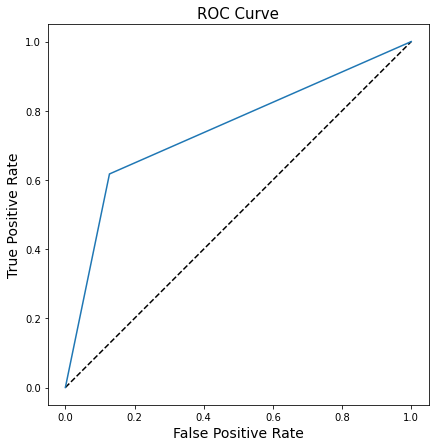

In [38]:
model_predict_test=model_decision.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_predict_test)
plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)